# The basics of Monte Carlo integration

https://towardsdatascience.com/the-basics-of-monte-carlo-integration-5fe16b40482d#:~:text=If%20we%20take%20a%20random,computed%20for%20random%20picked%20x_i.

Real value to find: 0.8413478010629014
Integral value:  0.8458203528862607
Calculation error: 0.019782562401873496


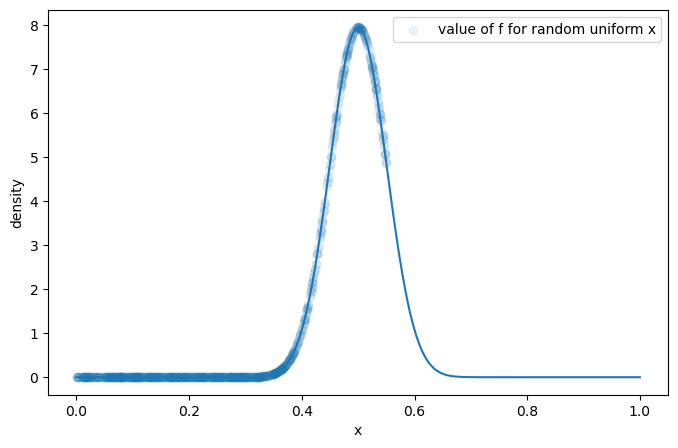

In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

N = 10000
a, b = (50, 50)
x_min, x_max = (0, .55)
randx = np.random.uniform(x_min, x_max, N)
y = stats.beta.pdf(randx, a, b)
print(f'Real value to find: {stats.beta(a,b).cdf(.55)}')
print(f'Integral value:  {(x_max-x_min)*y.sum()/N}')
print(f'Calculation error: {np.sqrt((x_max-x_min)*(y*y).sum()/N - (x_max-x_min)*y.mean()**2)/np.sqrt(N)}')

# Plotting 
plt.figure(figsize=(8,5))
x = np.linspace(0, 1, 1000)
plt.plot(x, stats.beta.pdf(x, a, b))
# Then, let's only plot a thousand points for more readability
plt.scatter(randx[:1000], y[:1000], alpha=.08, label='value of f for random uniform x')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.show()

Integral value: 0.8251414002275267


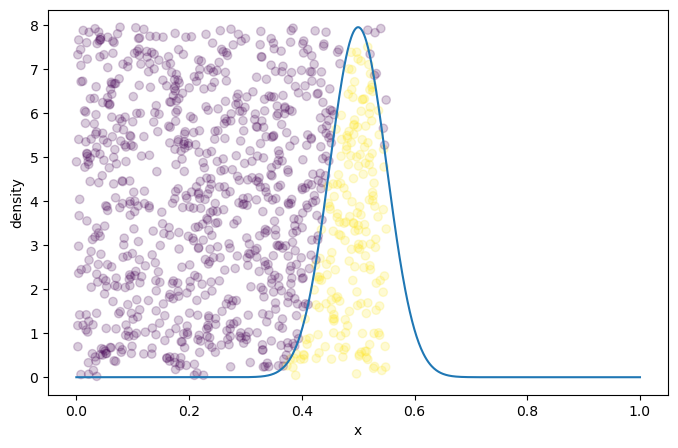

In [4]:
N = 10000
a, b = (50,50)
x_min, x_max = (0, .55)

randx = np.random.uniform(x_min,x_max, N)
y = stats.beta.pdf(randx, a, b)
randy = np.random.uniform(0,y.max(), N)
print(f'Integral value: {(x_max-x_min)*y.max()*(randy <= y).sum()/N}')

plt.figure(figsize=(8,5))
color = randy[:1000] <= y[:1000]
x = np.linspace(0, 1, 1000)
plt.plot(x, stats.beta.pdf(x, a, b))
plt.scatter(randx[:1000], randy[:1000], alpha=.2, c = color)
plt.xlabel('x')
plt.ylabel('density')
plt.show()